DIC Lab 3 ggplot2 Vignette
----------------------------------------------------------------------------------------------------------

In [1]:
library(ggplot2)

###### Different ways of declaring aesthetics

In [2]:
aes(x = mpg, y = wt)  #1
aes(mpg, wt)          #2

* x -> mpg
* y -> wt

* x -> mpg
* y -> wt

In [3]:
aes(x = mpg ^ 2, y = wt / cyl)

* x -> mpg^2
* y -> wt/cyl

###### Different ways of assigning color to an axis

In [4]:
aes(col = x)          #1
aes(fg = x)           #2
aes(color = x)        #3
aes(colour = x)       #4

* colour -> x

* colour -> x

* colour -> x

* colour -> x

###### Different Plotting Methods

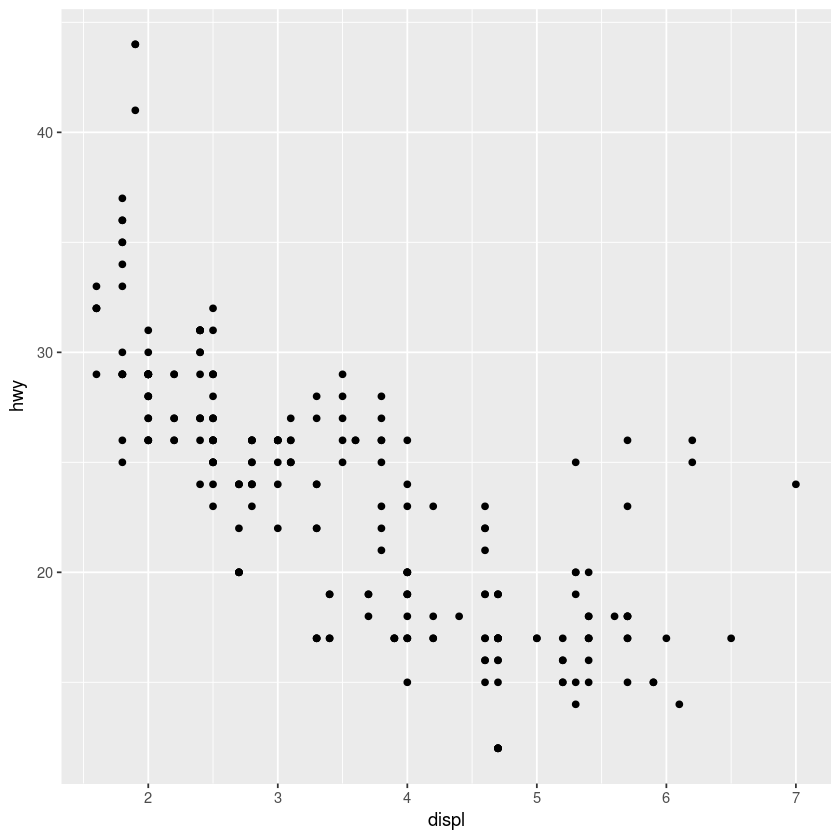

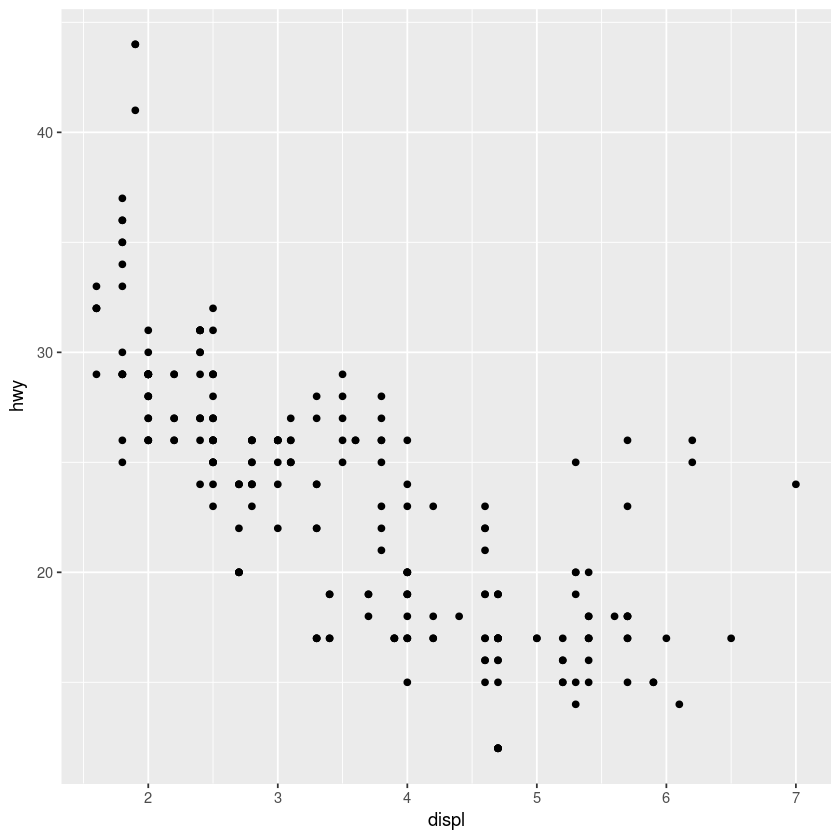

In [5]:
ggplot(mpg, aes(displ, hwy)) + geom_point()   #1

ggplot(mpg) + geom_point(aes(displ, hwy))     #2

##### Setting up axis-names using "" for aes_string() and ~ for aes() 

In [6]:
aes_(~Height, ~Weight, col = ~cyl)
aes_string("Height", "Weight", col = "cyl")

* colour -> cyl
* x      -> Height
* y      -> Weight

* colour -> cyl
* x      -> Height
* y      -> Weight

In [7]:
# Convert strings to names with as.name

aes(col = as.name(var))

* colour -> as.name(var)

##### Different Graphs

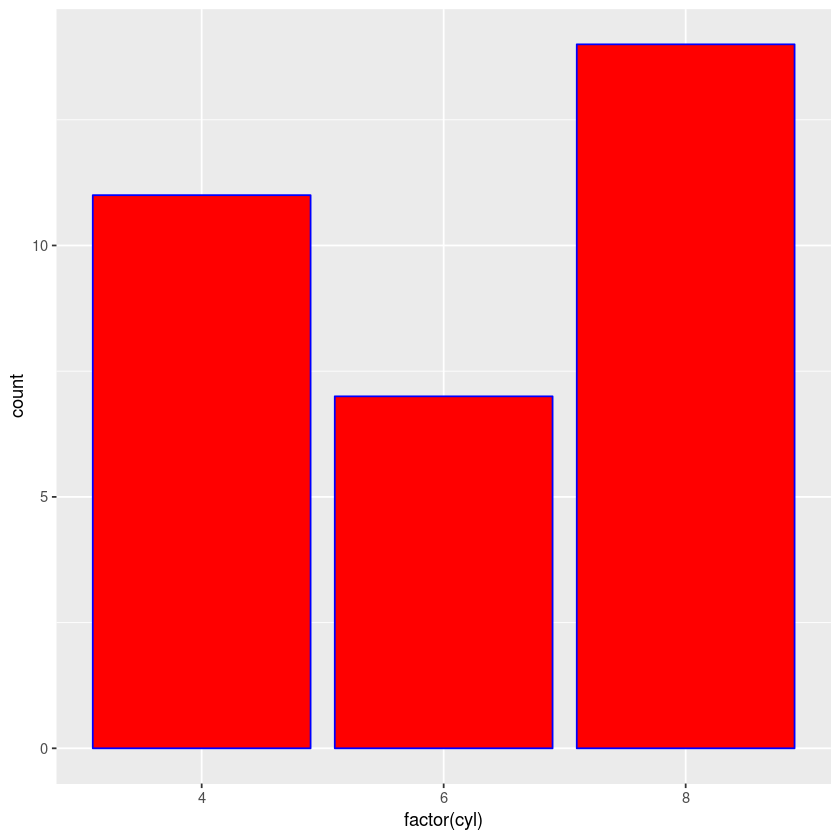

In [8]:
#Bar chart example: geom_bar()
graph<- ggplot(mtcars, aes(factor(cyl)))
graph + geom_bar(fill = "red", colour = "blue")

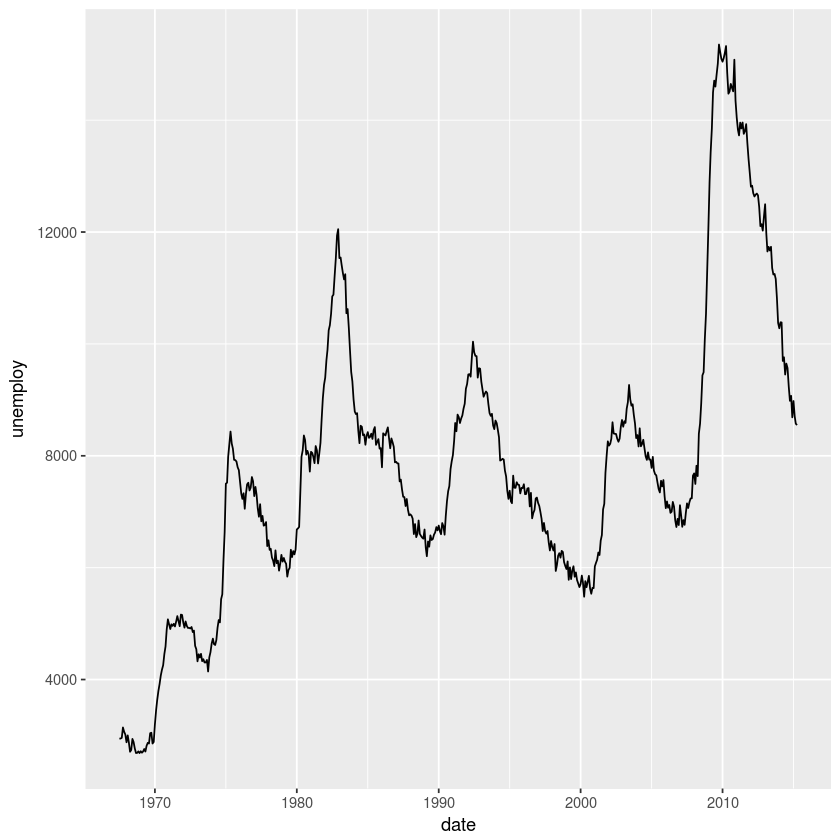

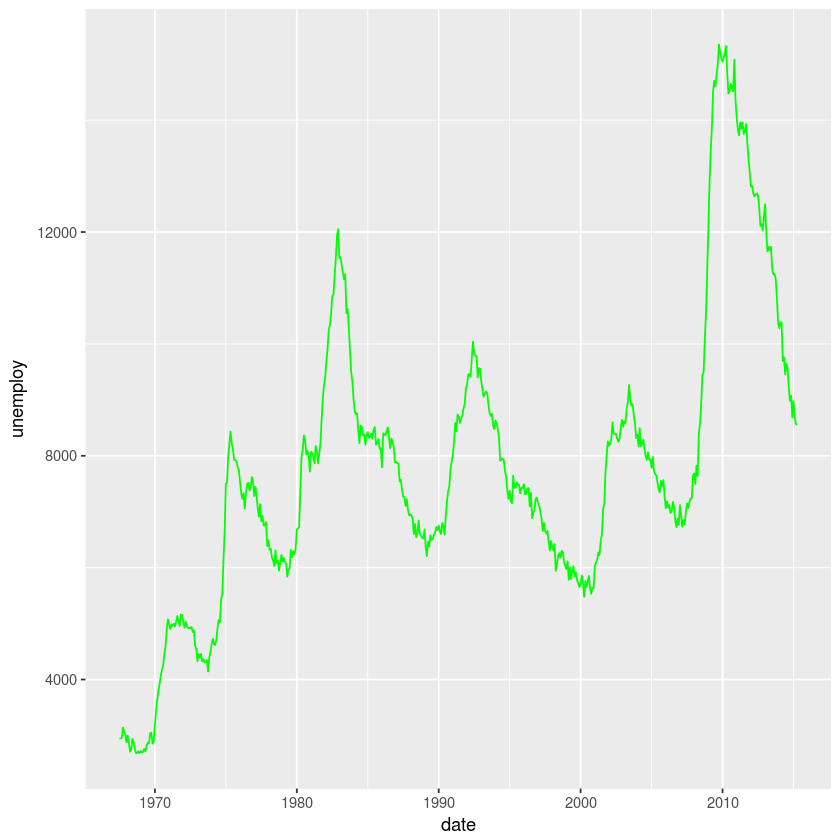

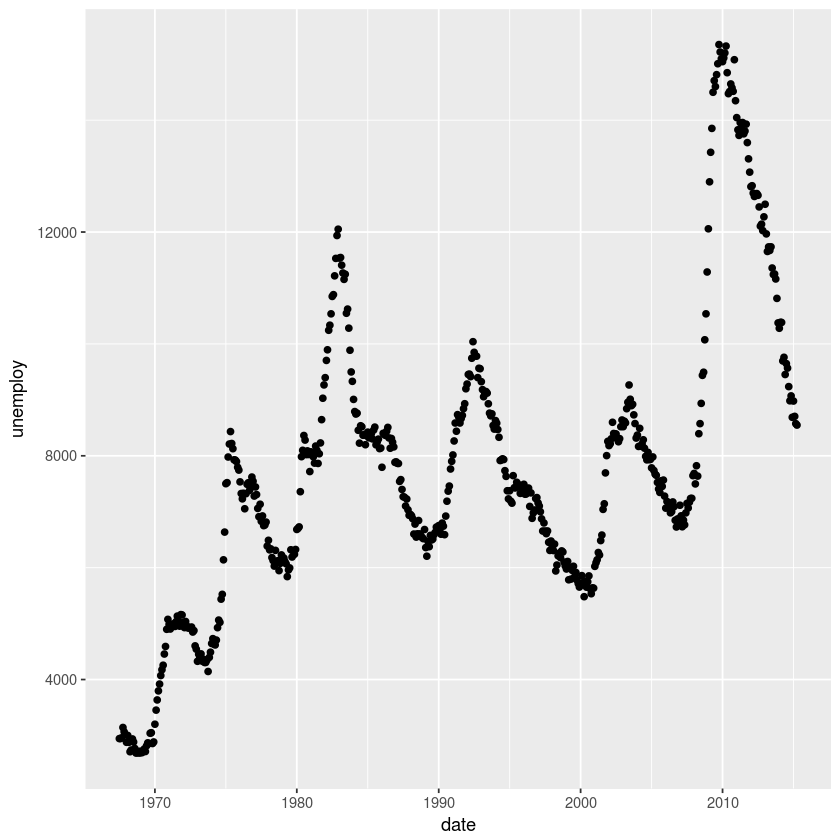

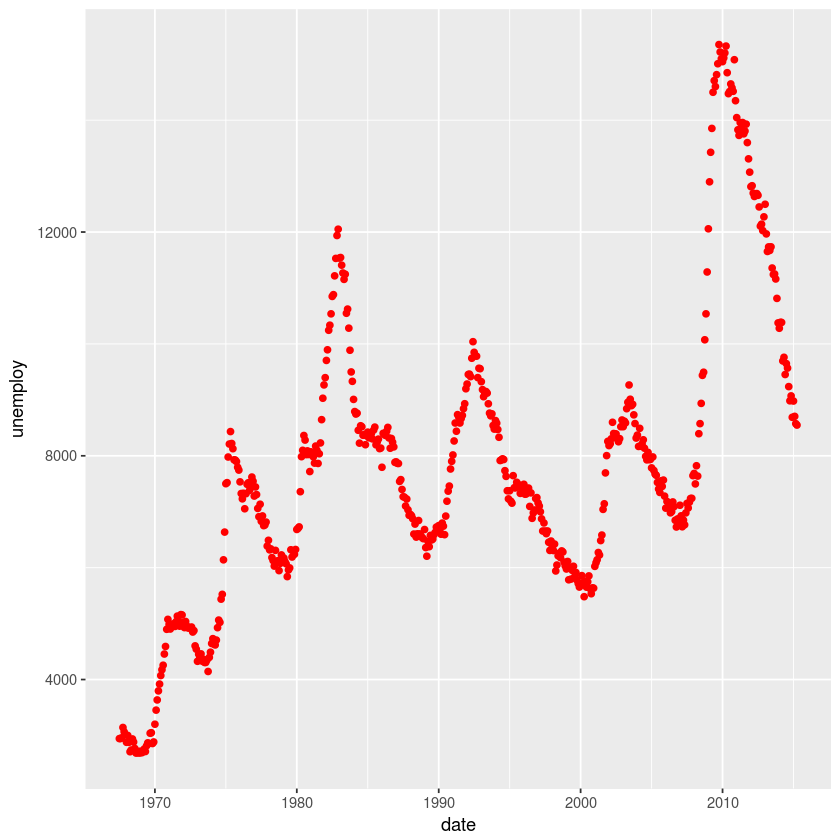

In [9]:
#Some geoms don't use both aesthetics (i.e. geom_point or geom_line)
b<- ggplot(economics, aes(x = date, y = unemploy))
b+ geom_line()
b+ geom_line(colour = "green")
b+ geom_point()
b+ geom_point(colour = "red")

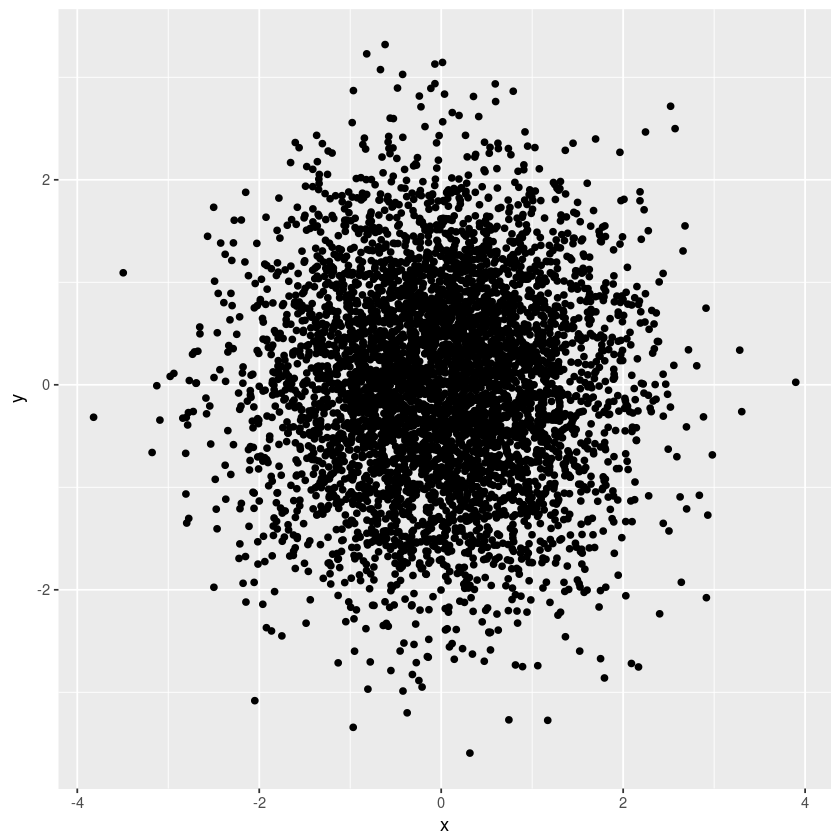

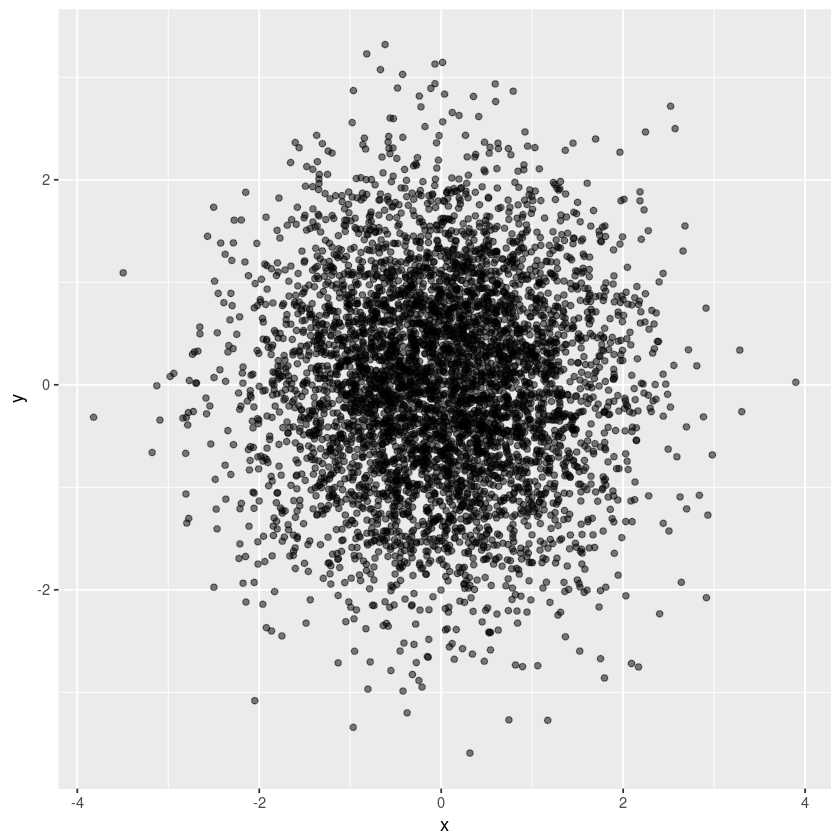

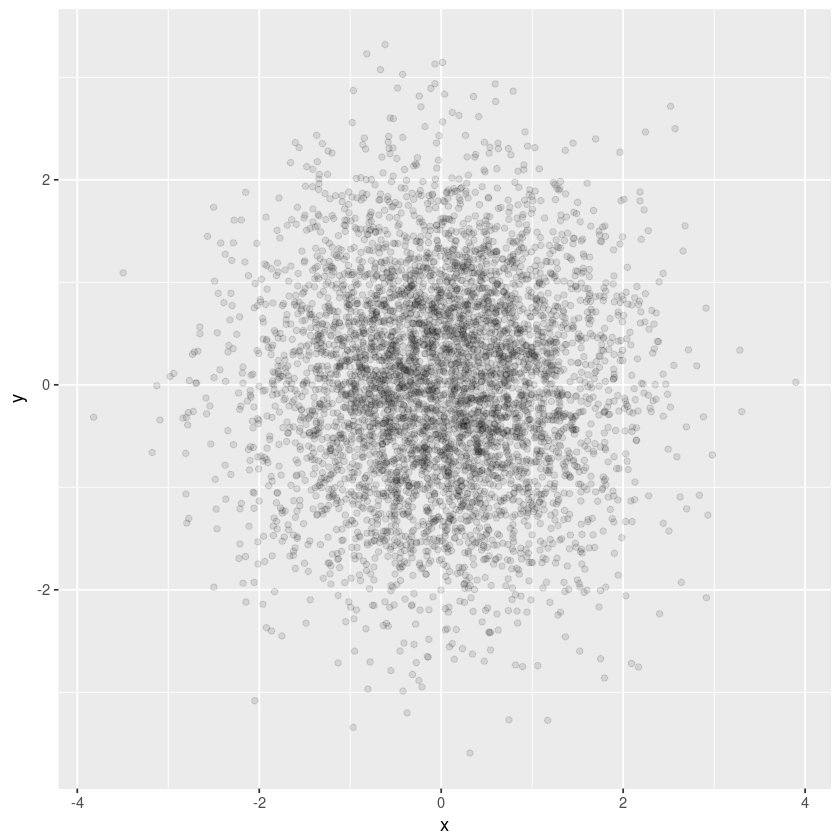

In [10]:
# For large datasets with overplotting the alpha
# aesthetic will make the points more transparent
df <- data.frame(x = rnorm(5000), y = rnorm(5000))
h <- ggplot(df, aes(x,y))
h + geom_point()
h + geom_point(alpha = 0.5)
h + geom_point(alpha = 1/10)

### Harvard Tutorial

In [11]:
housing <- read.csv("Rgraphics/dataSets/landdata-states.csv")
head(housing[1:5])

State region Date    Home.Value Structure.Cost
1 AK    West   2010.25 224952     160599        
2 AK    West   2010.50 225511     160252        
3 AK    West   2009.75 225820     163791        
4 AK    West   2010.00 224994     161787        
5 AK    West   2008.00 234590     155400        
6 AK    West   2008.25 233714     157458

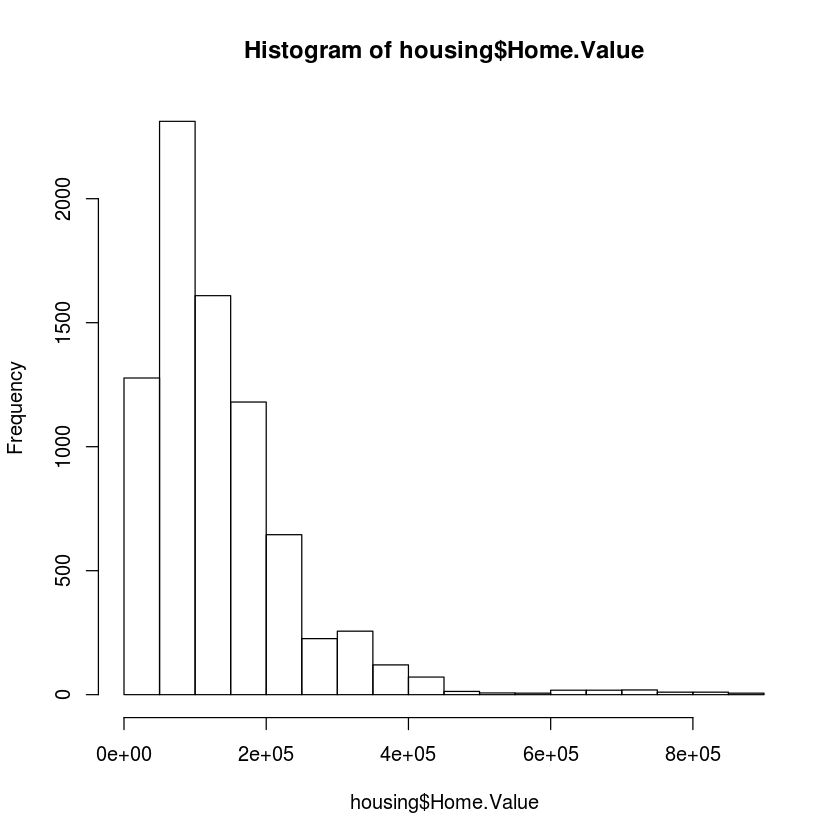

In [12]:
#Using Base graph for histogram (Simple graph)
hist(housing$Home.Value)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


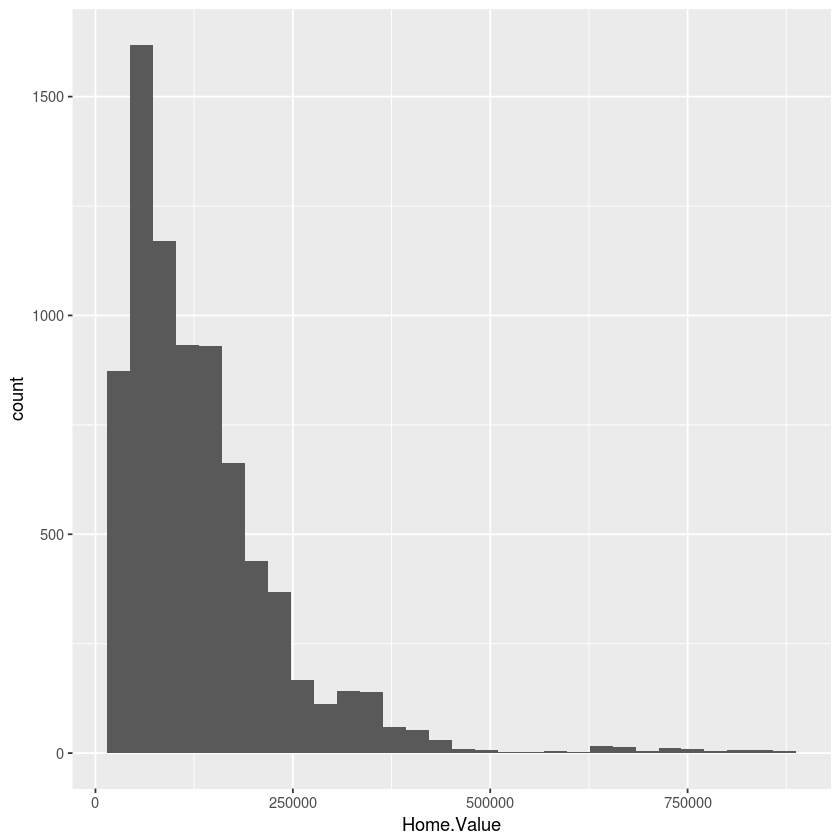

In [13]:
# ggplot2 Histogram (Simple graph)
library(ggplot2)
ggplot(housing, aes(x = Home.Value)) + geom_histogram()

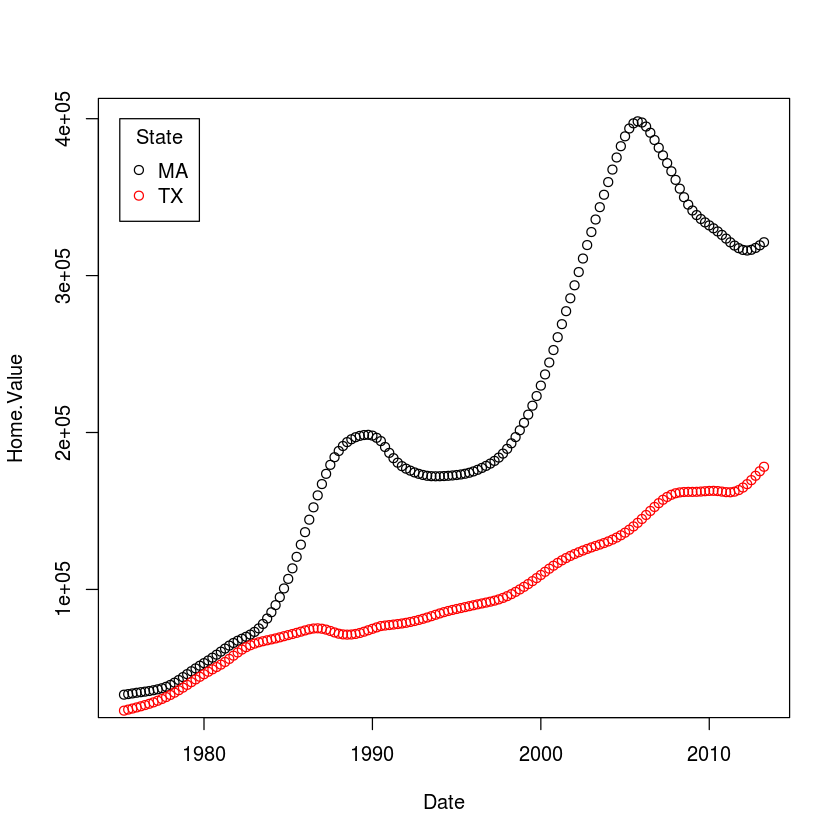

In [14]:
#Base graphics for complex graph
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

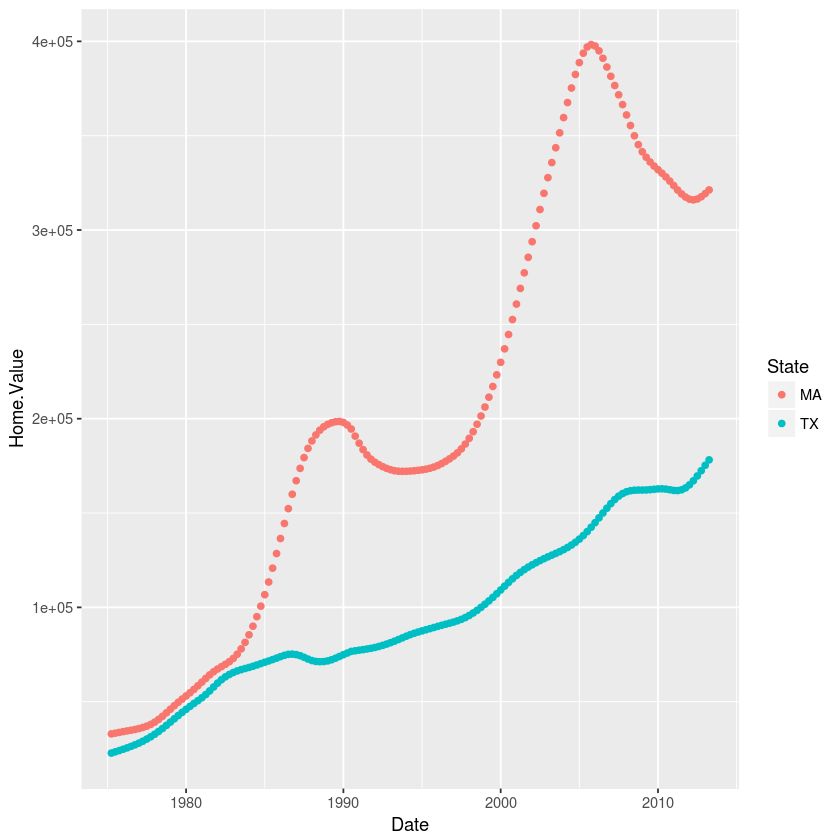

In [15]:
#ggplot for complex graph
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

#### Aesthetic Mapping

In ggplot land aesthetic means "something you can see". Examples include:

1. position (i.e., on the x and y axes)
2. color ("outside" color)
3. fill ("inside" color)
4. shape (of points)
5. linetype
6. size

#### Geometic Objects (geom)

Geometric objects are the actual marks we put on a plot. Examples include:

1. points (geom_point, for scatter plots, dot plots, etc)
2. lines (geom_line, for time series, trend lines, etc)
3. boxplot (geom_boxplot, for, well, boxplots!)

A plot must have at least one geom; there is no upper limit. You can add a geom to a plot using the + operator

To obtain information about different geom objects use the command below.

In [16]:
help.search("geom_", package = "ggplot2")


#### ScatterPlot

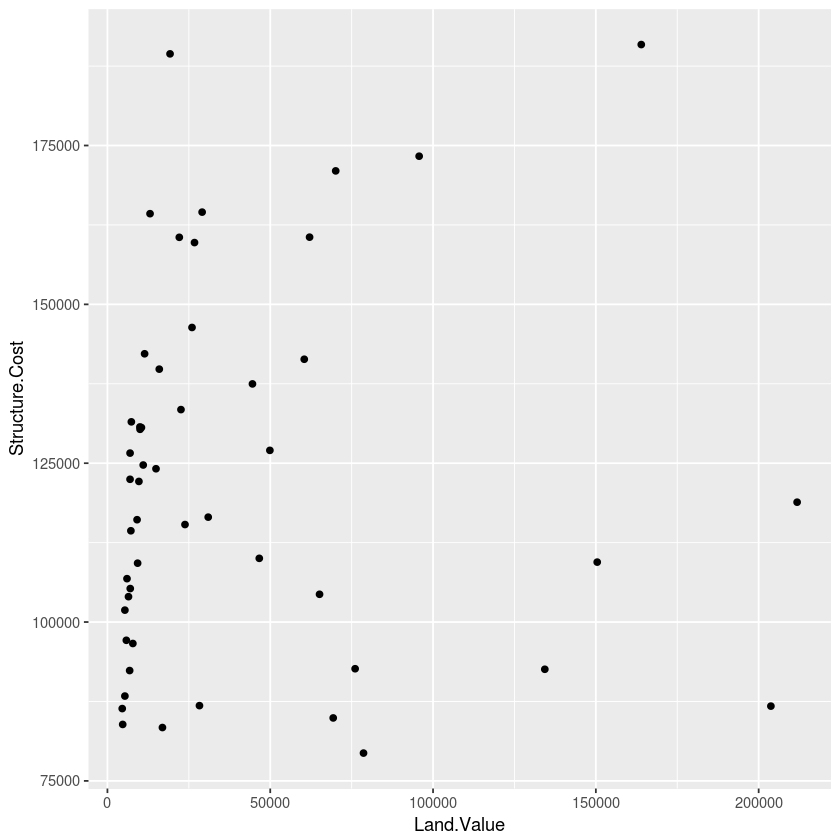

In [17]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

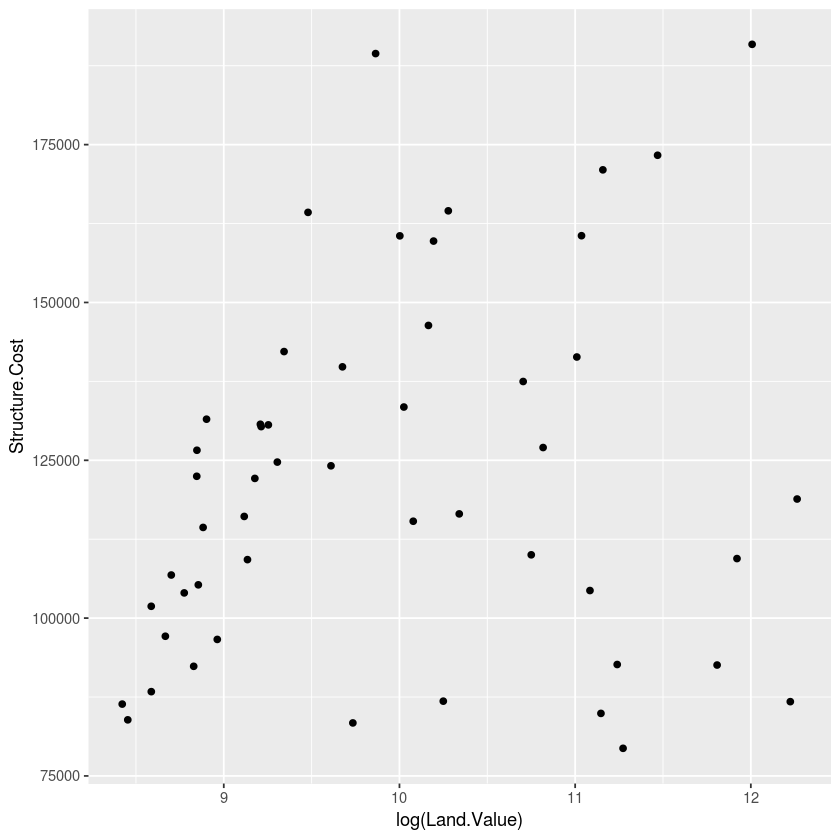

In [18]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

#### Lines (Prediction Line)

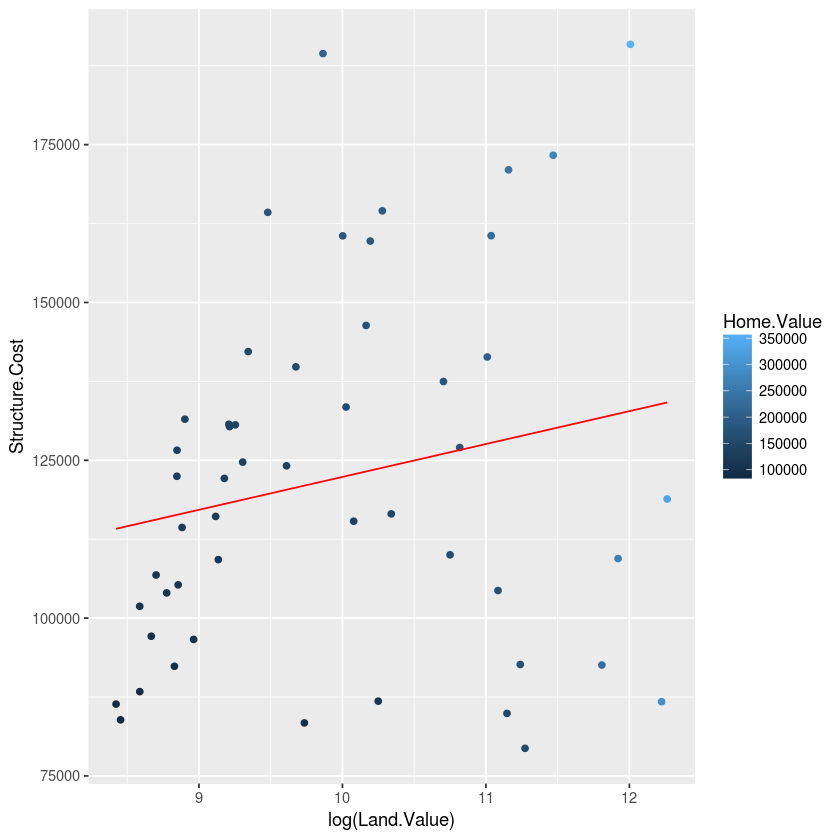

In [19]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC),color="red")

#### Smoothers

Not all geometric objects are simple shapes–the smooth geom includes a line and a ribbon.

`geom_smooth()` using method = 'loess'


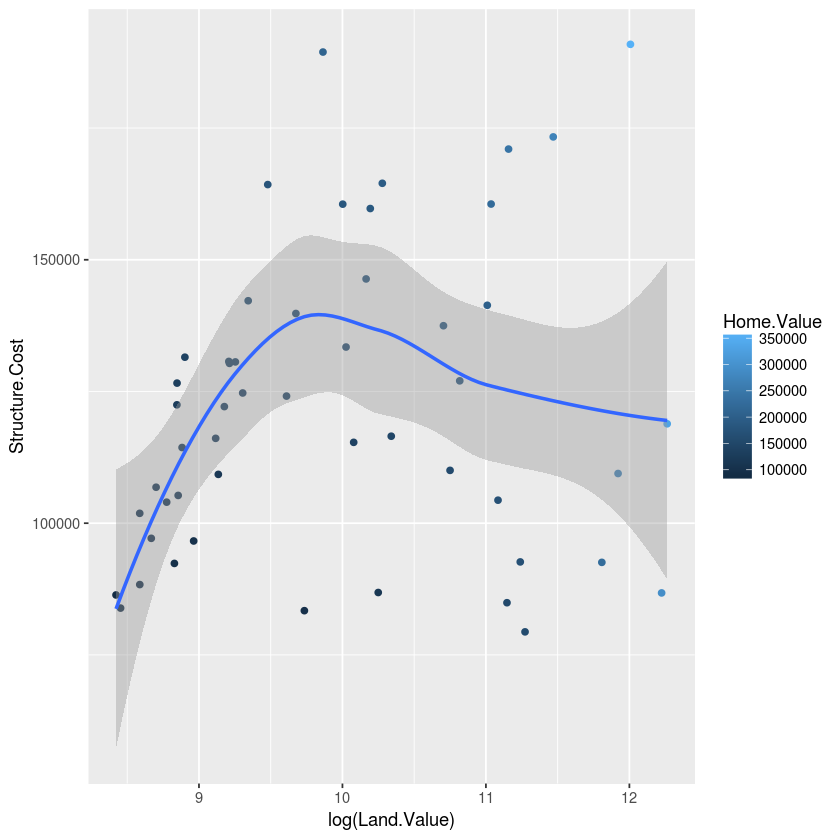

In [20]:
p1 +
  geom_point(aes(color = Home.Value)) +
  geom_smooth()

#### Text (Label Points)

Each geom accepts a particualar set of mappings–for example geom_text() accepts a labels mapping.



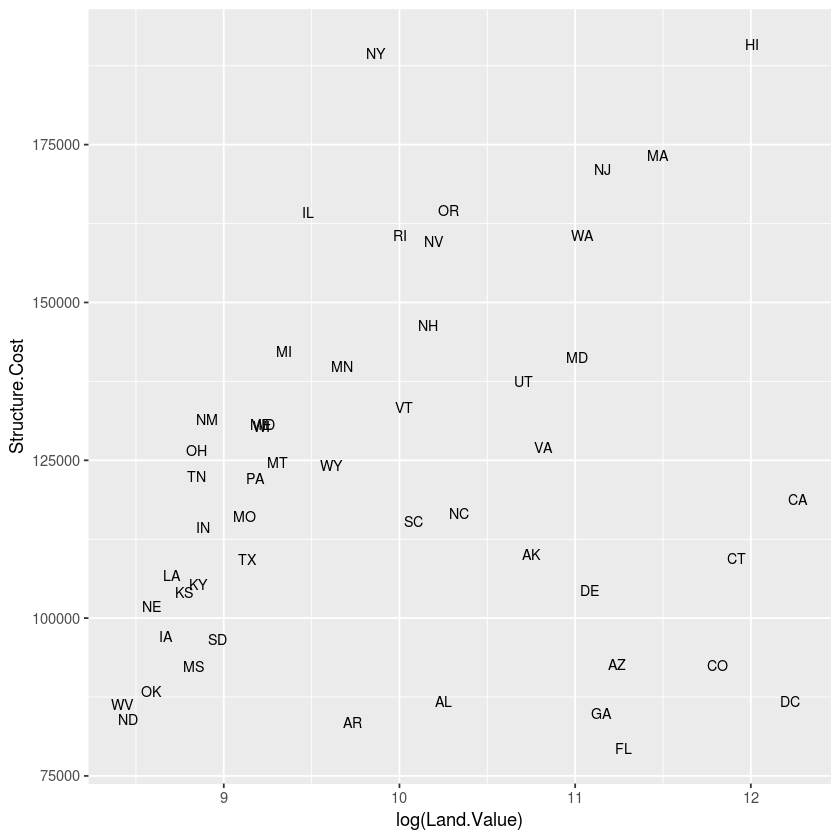

In [21]:
p1 + geom_text(aes(label=State), size = 3)

#### Aesthetic Mapping VS Assignment

Note that variables are mapped to aesthetics with the aes() function, while fixed aesthetics are set outside the aes() call. This sometimes leads to confusion, as in this example:

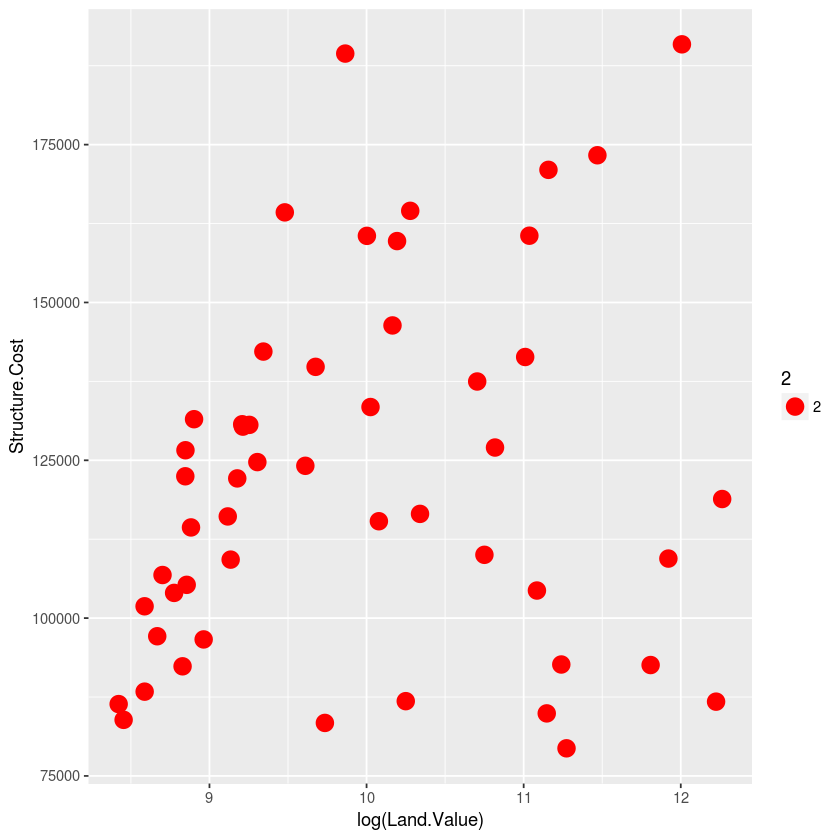

In [22]:
p1 +
  geom_point(aes(size = 2),# incorrect! 2 is not a variable. Only VARIABLES can be assigned to aesthetics.
             color="red") # this is fine -- all points red

#### Mapping Variables To Other Aesthetics

Other aesthetics are mapped in the same way as x and y in the previous example.

Warning message:
“Removed 1 rows containing missing values (geom_point).”

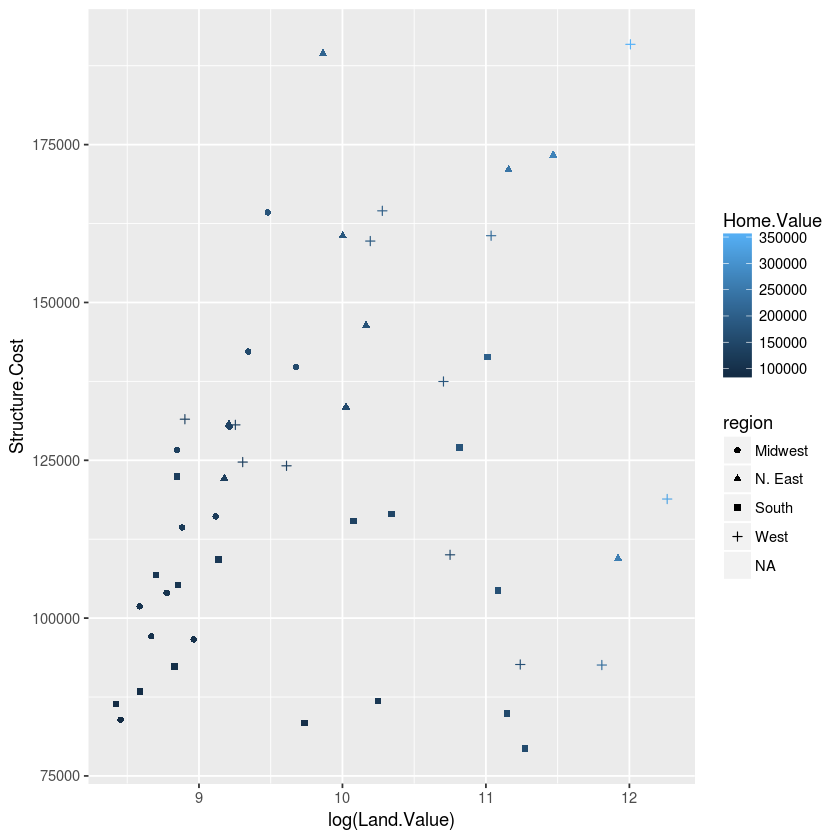

In [23]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

##### Stat

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


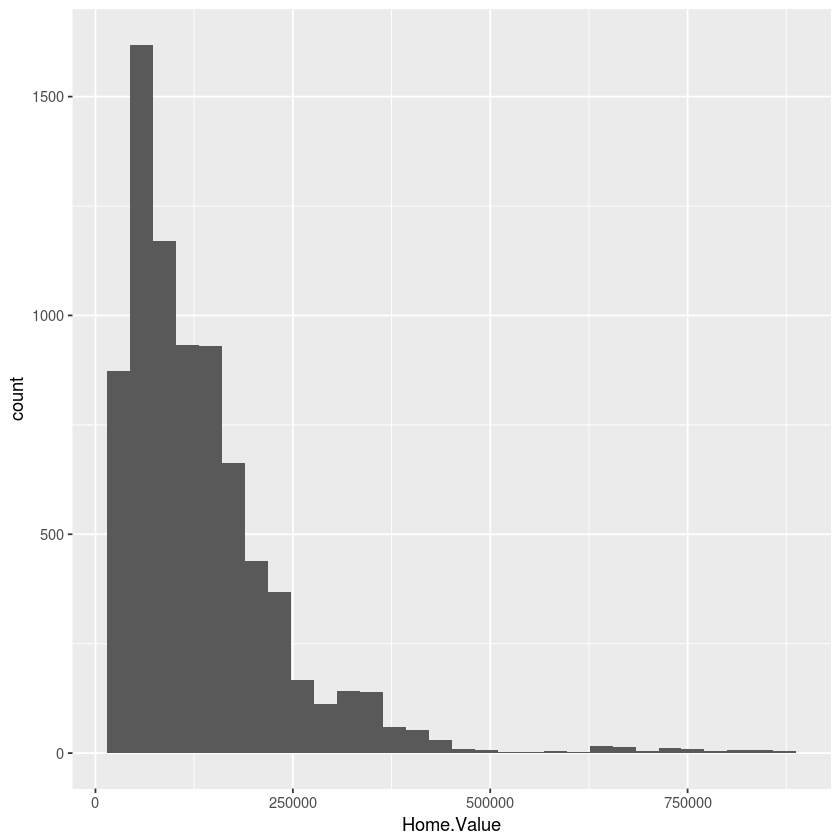

In [24]:

p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()


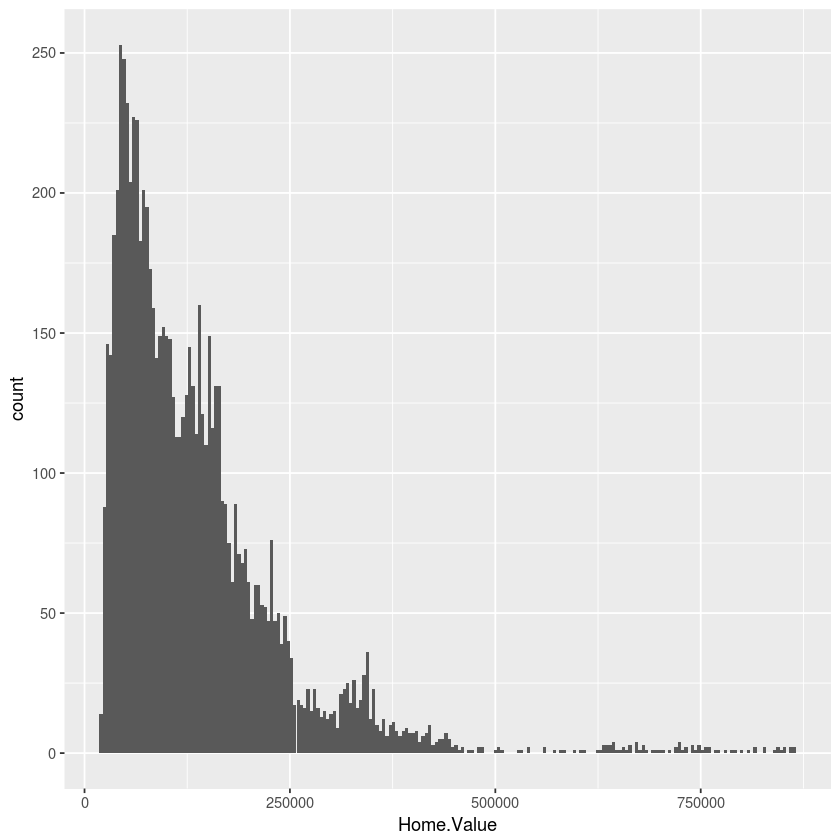

In [25]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

In [26]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

State Home.Value
1  AK    147385.14 
2  AL     92545.22 
3  AR     82076.84 
4  AZ    140755.59 
5  CA    282808.08 
6  CO    158175.99 
46 VA    155391.44 
47 VT    132394.60 
48 WA    178522.58 
49 WI    108359.45 
50 WV     77161.71 
51 WY    122897.25

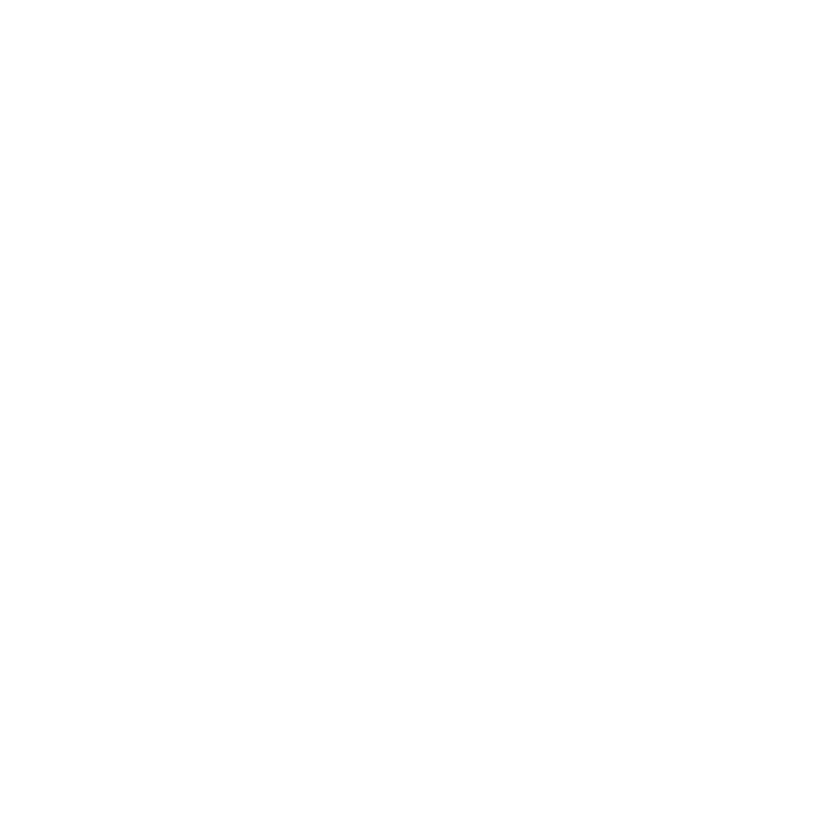

In [27]:
#Basically we take binned and summarized data and ask ggplot to bin and summarize it again (remember, geom_bar defaults to stat = stat_count); obviously this will not work. We can fix it by telling geom_bar to use a different statistical transformation function
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar()



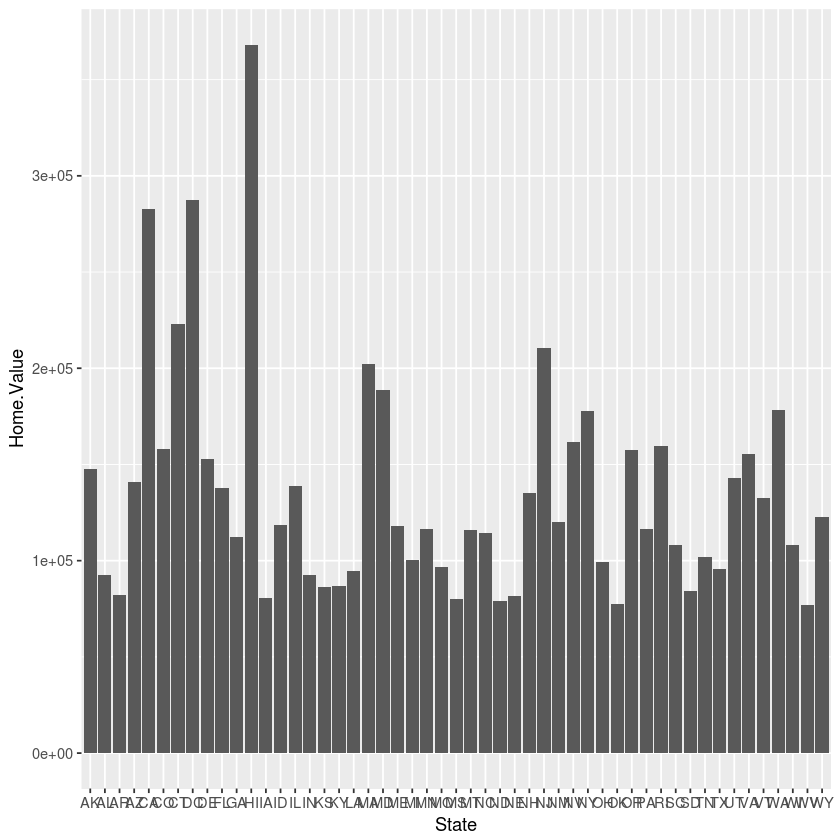

In [28]:

ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")

#### Scales

##### Scales: Controlling Aesthetic Mapping

Aesthetic mapping (i.e., with aes()) only says that a variable should be mapped to an aesthetic. It doesn't say how that should happen. For example, when mapping a variable to shape with aes(shape = x) you don't say what shapes should be used. Similarly, aes(color = z) doesn't say what colors should be used. Describing what colors/shapes/sizes etc. to use is done by modifying the corresponding scale. In ggplot2 scales include

1. position
2. color and fill
3. size
4. shape
5. line type

Scales are modified with a series of functions using a scale_<aesthetic>_<type> naming scheme. 

1. name: gives the legend/title of the graph
2. limits: min. and max. of the scale is given
3. breaks: points along the scale where labels appear
4. labels: labels that appear at each break

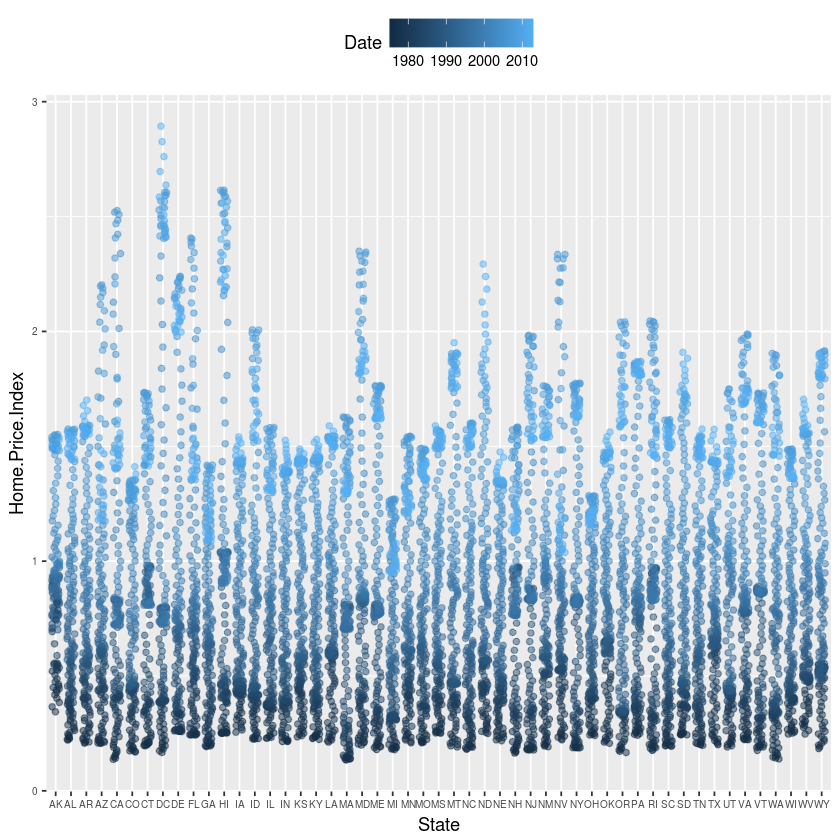

In [29]:
#Example 1:

p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))

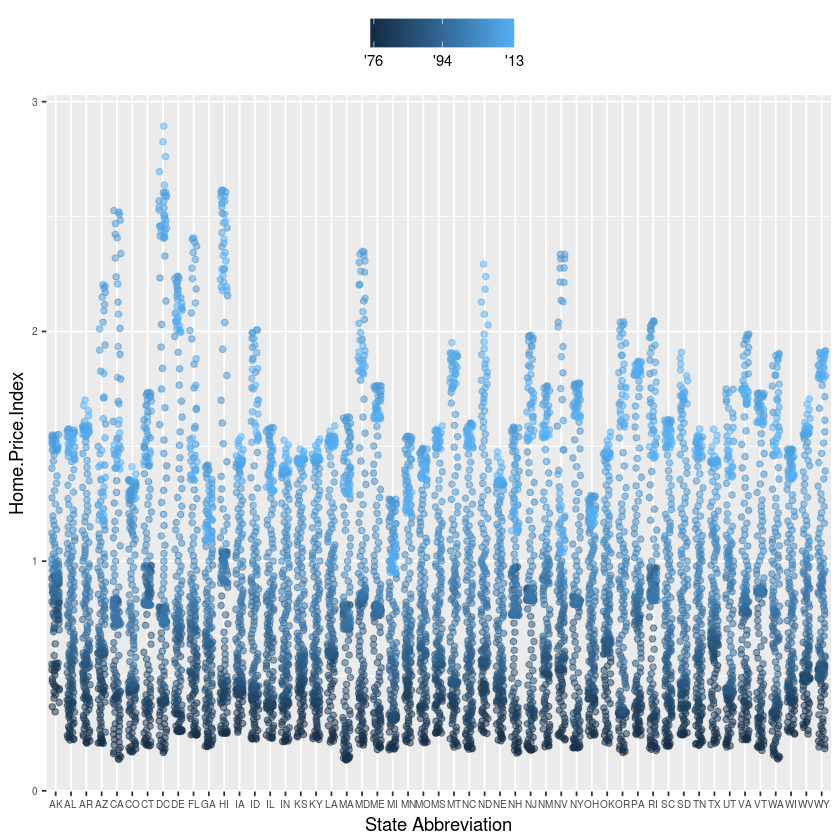

In [30]:
#Modifications made using scale

p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

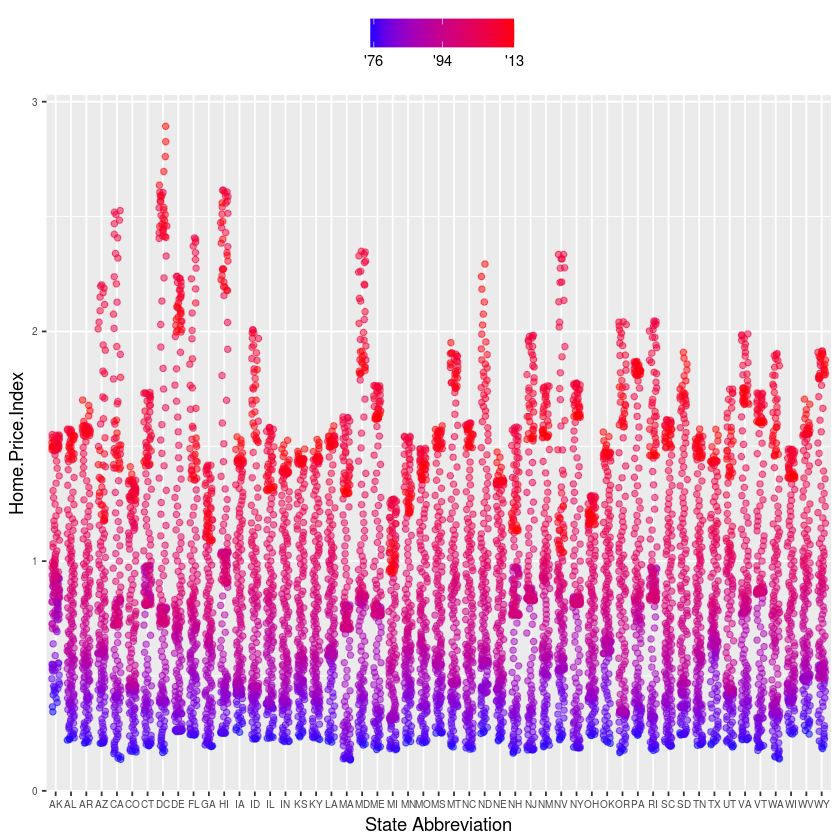

In [31]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

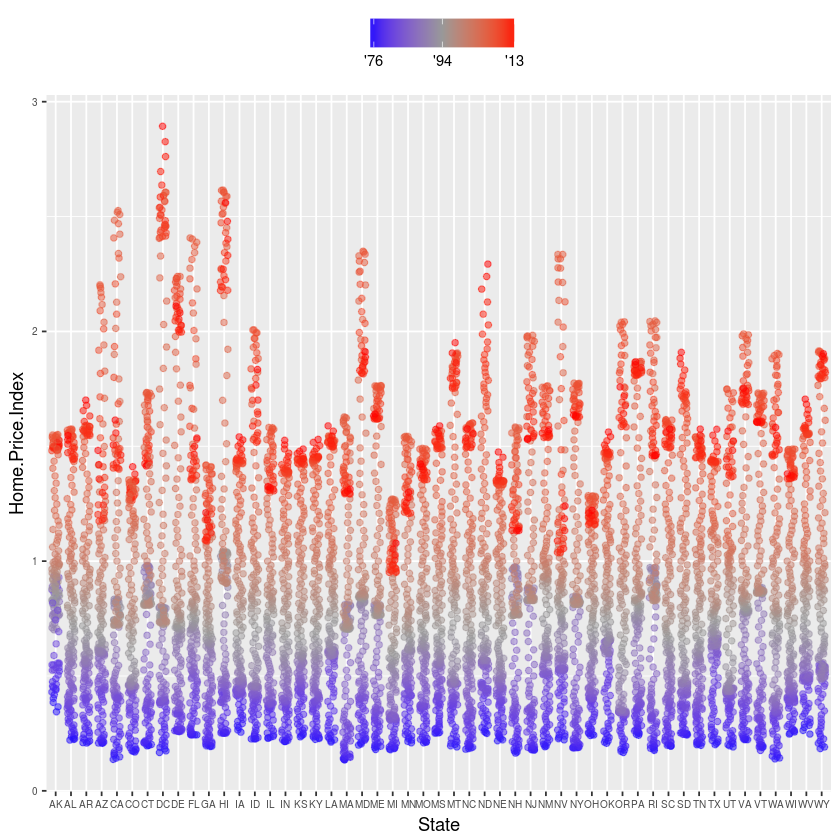

In [32]:
p4 +
  scale_color_gradient2(name="",
                        breaks = c(1976, 1994, 2013),
                        labels = c("'76", "'94", "'13"),
                        low = "blue",
                        high = "red",
                        mid = "gray60",   # Setting different color for mid-point
                        midpoint = 1994)  # Setting a mid-point

#### Faceting
Used to plot separate graphs for a subset of data. (When the data is too large, it can't be completely handled using a single graph. Hence facets are used to facilitate that handling.) 

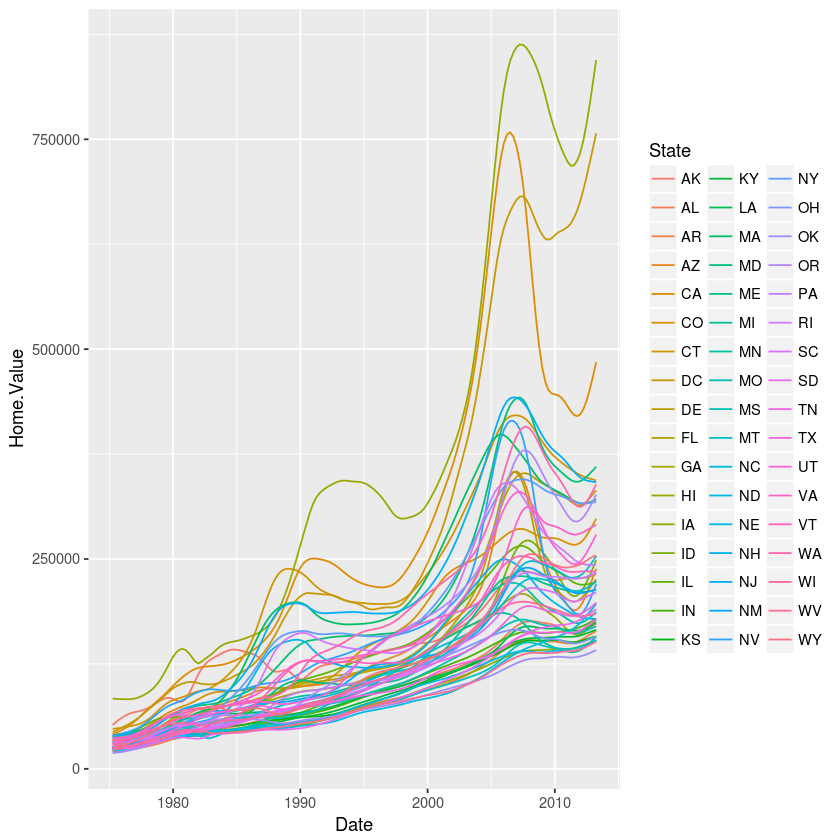

In [33]:
# Example:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

From the above graph we can see that its difficult to read such data. Hence we will create facets.

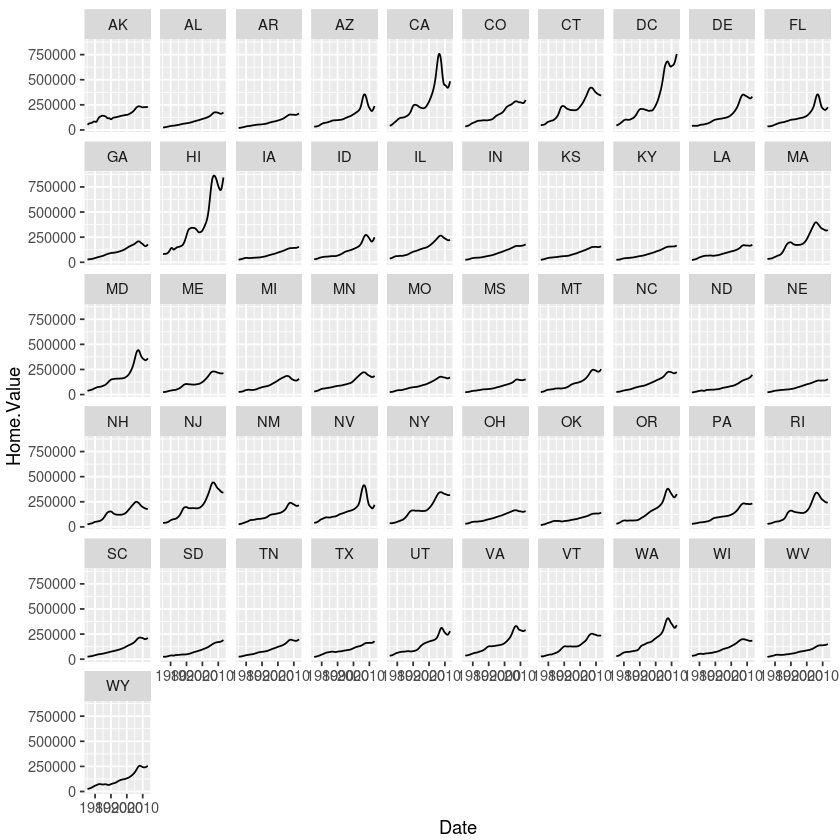

In [34]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

As you can see, maps for different states can be combined and compared simultaneously here. Hence facets are preferred.

#### Themes
They handle the non-plotting portions of the graphs such as
1. Axis labels
2. Plot background
3. Facet label background
4. Legend appearance

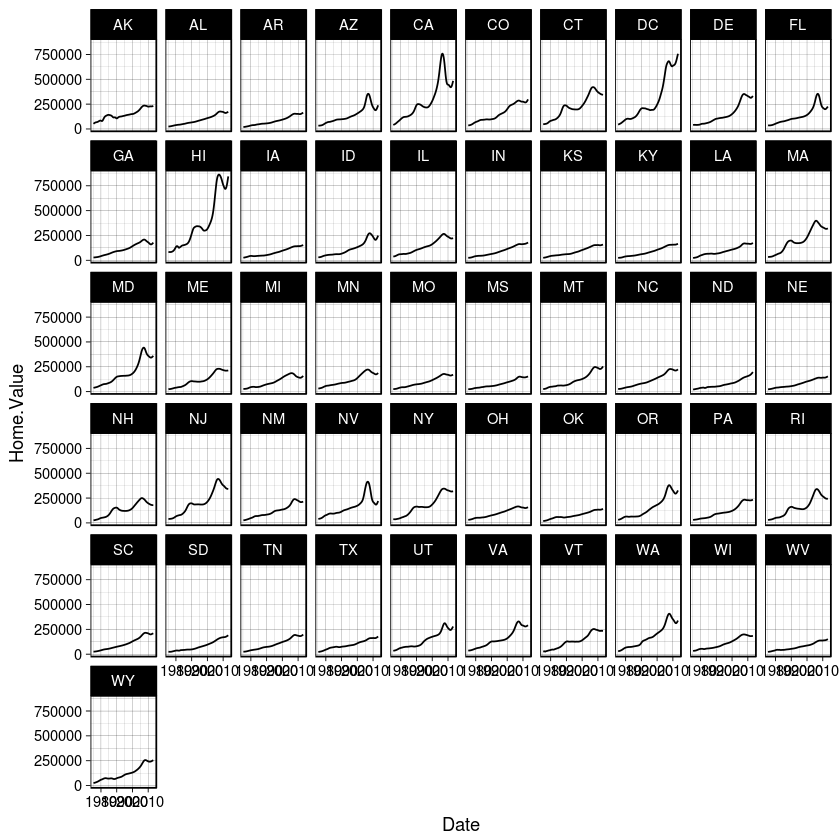

In [35]:
p5 + theme_linedraw()

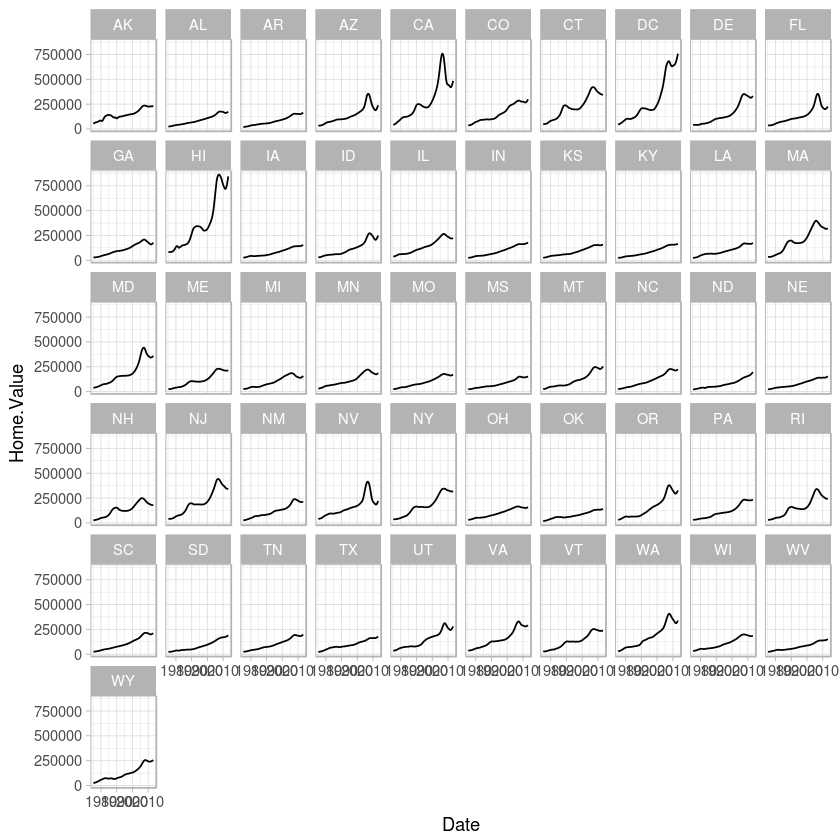

In [36]:
p5 + theme_light()

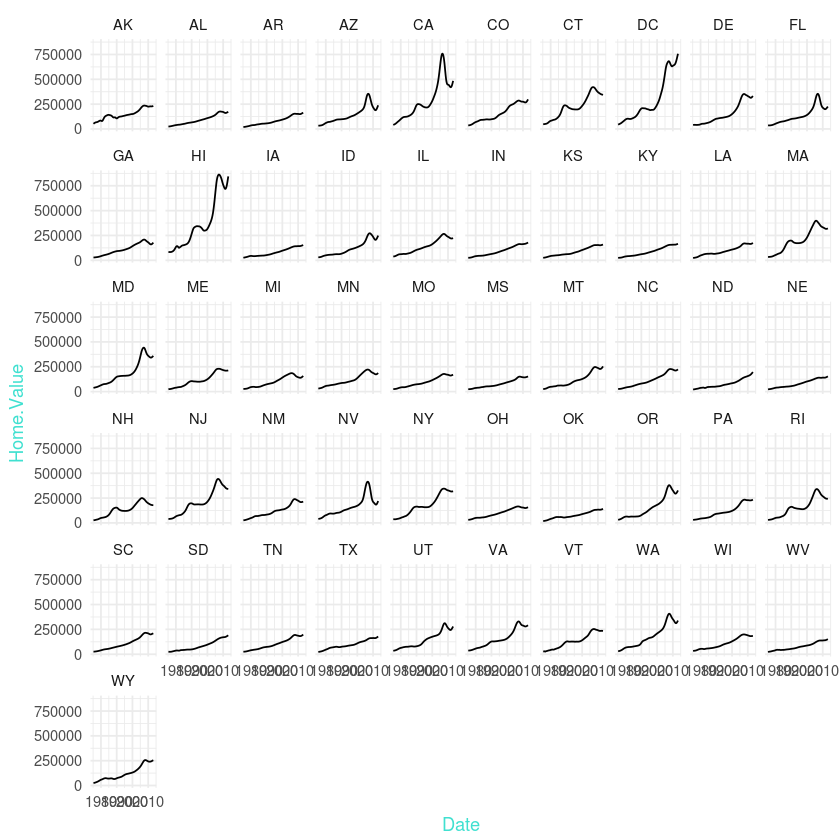

In [37]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

##### Creating new themes:

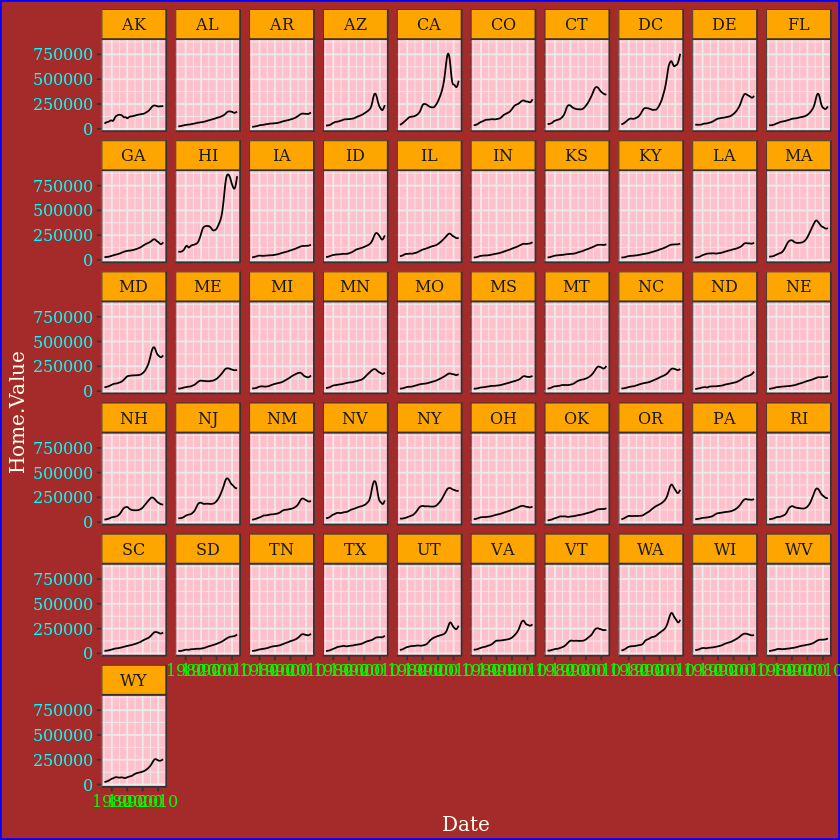

In [38]:
theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "brown"),
        text=element_text(size = 12, family = "Serif", color = "ivory"),
        axis.text.y = element_text(colour = "cyan"),
        axis.text.x = element_text(colour = "green"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = "orange"))

p5 + theme_new

##### Map Aesthetic To Different Columns

The most frequently asked question goes something like this: I have two variables in my data.frame, and I'd like to plot them as separate points, with different color depending on which variable it is. How do I do that?

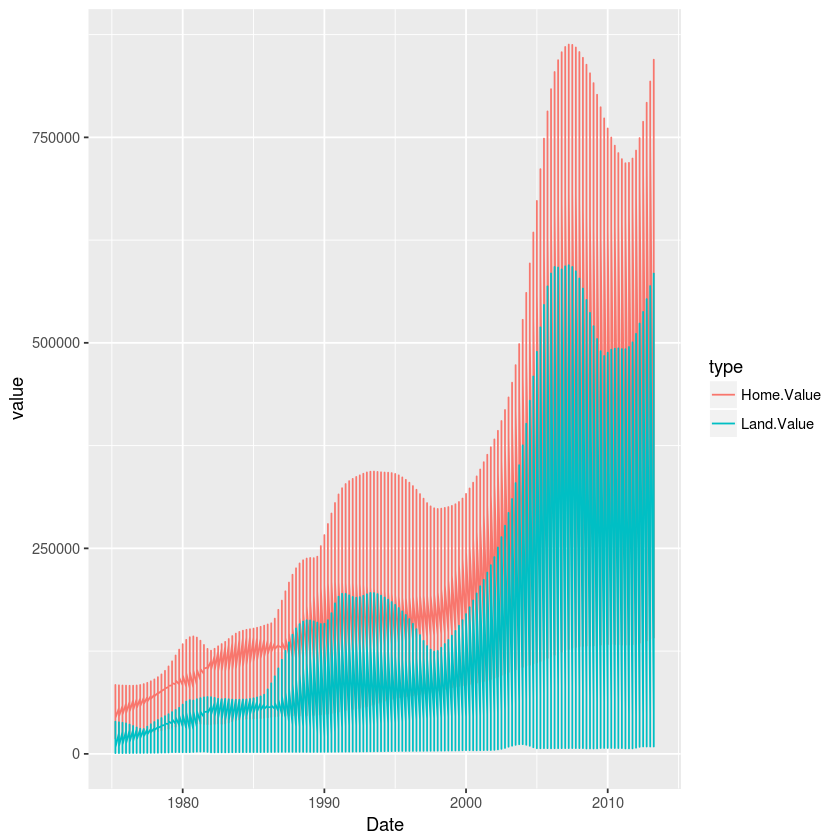

In [39]:
#Answer:
library(tidyr)
home.land.byyear <- gather(housing,
                           value = "value",
                           key = "type",
                           Home.Value, Land.Value)
ggplot(home.land.byyear,
       aes(x=Date,
           y=value,
           color=type)) +
  geom_line()